In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Read and Setup Data for Modeling

In [2]:
class Data():
    
    def dataAllocation(self,path):
        """Separate out the x_data and y_data and return each

        Args:
            path (_type_): string path for .parquet file

        Returns:
            _type_: pandas dataframe, pandas series
        """
        df = pd.read_parquet(path)
        df = df[df['state_code_NY'] == True]
        

        x_data = df.drop(['application_approved'], axis=1)

        y_data = df['application_approved']
        
        return x_data,y_data

    def trainSets(self,x_data,y_data):
        
        """Split 70% of the data into training and 30% into test sets. Call them x_train, x_test, y_train and y_test

        Args:
            x_data (_type_): pandas dataframe
            y_data (_type_): pandas dataframe

        Returns:
            _type_: pandas dataframe, pandas dataframe, pandas series, pandas series
        """
        from sklearn.model_selection import train_test_split

        # Split data
        x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=614, shuffle=True)
        #fill any nan values in y with 0
        y_train = y_train.fillna(0)

        #any nan values in X_train fill with 0
        x_train = x_train.fillna(0)

        #any nan values in X_train fill with 0
        y_test = y_test.fillna(0)

        #any nan values in X_test fill with 0
        x_test = x_test.fillna(0)


        return x_train, x_test, y_train, y_test


In [3]:
# Navigate up one level from the current directory
parent_dir = os.path.dirname(os.getcwd())

# Define the relative path to the Parquet file from the parent directory
relative_path = r"df_small_encoded.parquet"

# Concatenate the parent directory path and the relative path to get the full path
full_path = os.path.join(parent_dir, relative_path)


In [5]:
# set up data read data

datatest = Data()

# seperate target variable and features 

x_data,y_data = datatest.dataAllocation(full_path)

# split to train and testing
x_train, x_test, y_train, y_test = datatest.trainSets(x_data,y_data)

# Modeling

## 1. Linear Regression

In [4]:
class LinearRegressionModel():
    
  
    def linearClassifier(self,x_train, x_test, y_train):
        """LinearRegression classifier

        Args:
            x_train (_type_): pandas series
            x_test (_type_): pandas series
            y_train (_type_): pandas series

        Returns:
            _type_: numpy array, numpy array
        """
        from sklearn.linear_model import LinearRegression

        model_lr = LinearRegression()

        model_lr.fit(x_train, y_train)

        # Make predictions
        y_predict_train = model_lr.predict(x_train)
        y_predict_test = model_lr.predict(x_test)

        # -------------------------------
        return y_predict_train, y_predict_test

    def lgTrainAccuracy(self,y_train,y_predict_train):
        """accuracy (on the training set) using the accuracy_score method.
            Round the output values greater than or equal to 0.5 to 1 and those less than 0.5 to 0. You can use any method that satisfies the requriements

        Args:
            y_train (_type_): pandas series
            y_predict_train (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import accuracy_score
        # Convert regression predictions to binary classification labels
        y_train_pred_class = [1 if y >= 0.5 else 0 for y in y_predict_train]

        # Calculate accuracy (not a standard approach for regression)
        train_accuracy = accuracy_score(y_train, y_train_pred_class)
       
 
        return train_accuracy
    

    def lgTestAccuracy(self,y_test,y_predict_test):
        """accuracy (on the testing set) using the accuracy_score method
            Round the output values greater than or equal to 0.5 to 1 and those less than 0.5 to 0. You can use any method that satisfies the requriements

        Args:
            y_test (_type_): pandas series
            y_predict_test (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import accuracy_score
        # Convert regression predictions to binary classification labels
        y_test_pred_class = [1 if y >= 0.5 else 0 for y in y_predict_test]

        # Calculate accuracy (not a standard approach for regression)
        test_accuracy = accuracy_score(y_test, y_test_pred_class)
             
        return test_accuracy
    
    def lgTestReport(self,y_test,y_predict_test):
        """Report classification

        Args:
            y_test (_type_): pandas series
            y_predict_test (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import classification_report

        # Convert regression predictions to binary classification labels
        y_test_pred_class = [1 if y >= 0.5 else 0 for y in y_predict_test]

        # Calculate accuracy (not a standard approach for regression)
       
        class_report = classification_report(y_test, y_test_pred_class)
       
        return class_report

In [5]:
linear = LinearRegressionModel()
y_predict_train, y_predict_test = linear.linearClassifier(x_train,x_test, y_train)
print("linearClassifier Function Executed")
print("Linear Regression Train Accuracy: ", linear.lgTrainAccuracy(y_train,y_predict_train))
print("Linear Regression Test Accuracy: ", linear.lgTestAccuracy(y_test,y_predict_test))
print("Linear Regression Test Report: \n", linear.lgTestReport(y_test,y_predict_test))

linearClassifier Function Executed
Linear Regression Train Accuracy:  0.8924186148131964
Linear Regression Test Accuracy:  0.8926771490726968
Linear Regression Test Report: 
               precision    recall  f1-score   support

           0       0.66      0.04      0.08    230137
           1       0.89      1.00      0.94   1868745

    accuracy                           0.89   2098882
   macro avg       0.78      0.52      0.51   2098882
weighted avg       0.87      0.89      0.85   2098882



## 2. Logistic Regression

In [4]:
class LogsticRegressionModel():
    
  
    def logisticClassifier(self,x_train, x_test, y_train):
        """Logistic Regression classifier

        Args:
            x_train (_type_): pandas series
            x_test (_type_): pandas series
            y_train (_type_): pandas series

        Returns:
            _type_: numpy array, numpy array
        """
        from sklearn.linear_model import LogisticRegression

        model_lgr = LogisticRegression(max_iter=1000)

        model_lgr.fit(x_train, y_train)

        # Make predictions
        y_predict_train = model_lgr.predict(x_train)
        y_predict_test = model_lgr.predict(x_test)

        # -------------------------------
        return model_lgr, y_predict_train, y_predict_test

    def lgTrainAccuracy(self,y_train,y_predict_train):
        """accuracy (on the training set) using the accuracy_score method.
            Round the output values greater than or equal to 0.5 to 1 and those less than 0.5 to 0. You can use any method that satisfies the requriements

        Args:
            y_train (_type_): pandas series
            y_predict_train (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import accuracy_score

        # Calculate accuracy (not a standard approach for regression)
        train_accuracy = accuracy_score(y_train, y_predict_train)
       
 
        return train_accuracy
    

    def lgTestAccuracy(self,y_test,y_predict_test):
        """accuracy (on the testing set) using the accuracy_score method
            Round the output values greater than or equal to 0.5 to 1 and those less than 0.5 to 0. You can use any method that satisfies the requriements

        Args:
            y_test (_type_): pandas series
            y_predict_test (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import accuracy_score
        
        # Calculate accuracy (not a standard approach for regression)
        test_accuracy = accuracy_score(y_test, y_predict_test)
       
        return test_accuracy
    
    def lgTestReport(self,y_test,y_predict_test):
        """Report classification

        Args:
            y_test (_type_): pandas series
            y_predict_test (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import classification_report

        # Calculate accuracy (not a standard approach for regression)
       
        class_report = classification_report(y_test, y_predict_test)
       
        return class_report

In [5]:
logistic = LogsticRegressionModel()
model_lgr, y_predict_train, y_predict_test = logistic.logisticClassifier(x_train,x_test, y_train)
print("Logistic Classifier Function Executed")
print("Logistic Regression Train Accuracy: ", logistic.lgTrainAccuracy(y_train,y_predict_train))
print("Logistic Regression Test Accuracy: ", logistic.lgTestAccuracy(y_test,y_predict_test))
print("Logistic Regression Test Report: \n", logistic.lgTestReport(y_test,y_predict_test))

Logistic Classifier Function Executed
Logistic Regression Train Accuracy:  0.8878700695676677
Logistic Regression Test Accuracy:  0.8881857102971963
Logistic Regression Test Report: 
               precision    recall  f1-score   support

           0       0.31      0.02      0.03    230137
           1       0.89      1.00      0.94   1868745

    accuracy                           0.89   2098882
   macro avg       0.60      0.51      0.49   2098882
weighted avg       0.83      0.89      0.84   2098882



In [7]:
model_lgr.intercept_[0]


-0.15740794686549722

In [10]:
# Extract coefficients and corresponding feature names
coefficients = model.coef_[0]
feature_names = X.columns

# Extract intercept
intercept = model.intercept_[0]


# Create a DataFrame to display coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients by absolute value to identify significant variables
coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Add intercept to the DataFrame
intercept_row = pd.DataFrame({'Feature': 'Intercept', 'Coefficient': intercept, 'Abs_Coefficient': abs(intercept)}, index=[0])
coefficients_df = pd.concat([intercept_row, coefficients_df]).reset_index(drop=True)

# Display coefficients and feature names
print(coefficients_df)

                                               Feature  Coefficient  \
52                                       state_code_TX    -0.448948   
4                                           income_log     0.390970   
50         race_ethnicity_White|Not Hispanic or Latino     0.373799   
57                                  activity_year_2022    -0.354838   
43   race_ethnicity_Race Not Available|Hispanic or ...    -0.274510   
..                                                 ...          ...   
250                                  county_code_42041     0.000000   
76                                   county_code_05073     0.000000   
152                                  county_code_13297     0.000000   
138                                  county_code_08043     0.000000   
166                                  county_code_30081     0.000000   

     Abs_Coefficient  
52          0.448948  
4           0.390970  
50          0.373799  
57          0.354838  
43          0.274510  
..       

In [20]:
coefficients_df.to_csv(r"C:\Users\Forcessofnature\Downloads\coef.csv")

## Random Forest

In [8]:
class RFClassifier():
    
    # points [2]
    def randomForestClassifier(self,x_train,x_test, y_train):
        """RandomForestClassifie

        Args:
            x_train (_type_): pandas dataframe
            x_test (_type_): pandas dataframe
            y_train (_type_): pandas series

        Returns:
            _type_: RandomForestClassifier object, numpy array, numpy array
        """
        from sklearn.ensemble import RandomForestClassifier

        # Initialize the Random Forest model
        rf_clf = RandomForestClassifier(random_state=614)

        # Train the model on the training data
        rf_clf.fit(x_train, y_train)

        # Make predictions on the testing data
        y_predict_train = rf_clf.predict(x_train)

        y_predict_test = rf_clf.predict(x_test)
        
        return rf_clf,y_predict_train, y_predict_test
    

    def rfTrainAccuracy(self,y_train,y_predict_train):
        """Return accuracy on the training set using the accuracy_score method

        Args:
            y_train (_type_): pandas series
            y_predict_train (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import accuracy_score

        # Calculate accuracy on the training set
        train_accuracy = accuracy_score(y_train, y_predict_train)
        
        # -------------------------------
        return train_accuracy
    

    def rfTestAccuracy(self,y_test,y_predict_test):
        """Return accuracy on the test set using the accuracy_score method.

        Args:
            y_test (_type_): pandas series
            y_predict_test (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import accuracy_score
        # Calculate accuracy on the training set
        test_accuracy = accuracy_score(y_test, y_predict_test)


        return test_accuracy


    def rfFeatureImportance(self,rf_clf):
        """Determine the feature importance as evaluated by the Random Forest Classifier

        Args:
            rf_clf (_type_): RandomForestClassifier object

        Returns:
            _type_: float array
        """

        # Get feature importances
        feature_importance = rf_clf.feature_importances_
        
        # -------------------------------
        return feature_importance
    
    # points [1]
    def sortedRFFeatureImportanceIndicies(self,rf_clf):
        """Sorted by descending order and return the feature numbers[0 to ...]

        Args:
            rf_clf (_type_): RandomForestClassifier object

        Returns:
            _type_: int array
        """
        # Get feature importances
        feature_importance = rf_clf.feature_importances_

        # Sort feature importances in descending order
        sorted_indices = feature_importance.argsort()[::-1]
       
        return sorted_indices
    
    def hyperParameterTuning(self,rf_clf,x_train,y_train):
        """Tune the hyper-parameters 'n_estimators' and 'max_depth'

        Args:
            rf_clf (_type_): RandomForestClassifier object
            x_train (_type_): pandas dataframe
            y_train (_type_): pandas series

        Returns:
            _type_: GridSearchCV object
        """
        # param_grid for GridSearchCV as a dictionary

        param_grid = {
            'n_estimators': [4, 16, 256],
            'max_depth': [2, 8, 16]
        }
        from sklearn.model_selection import GridSearchCV

        # Create GridSearchCV object
        gscv_rfc = GridSearchCV(estimator=rf_clf, param_grid=param_grid)

        # Fit the GridSearchCV object to the training data
        gscv_rfc.fit(x_train, y_train)
        
        # -------------------------------
        return gscv_rfc
    
    # points [1]
    def bestParams(self,gscv_rfc):
        """best params, using .best_params_

        Args:
            gscv_rfc (_type_): GridSearchCV object

        Returns:
            _type_: parameter dict
        """
        best_params = gscv_rfc.best_params_

        return best_params
    
    # points [1]
    def bestScore(self,gscv_rfc):
        """Get the best score, using .best_score_.

        Args:
            gscv_rfc (_type_): GridSearchCV object

        Returns:
            _type_: float
        """
        best_score = gscv_rfc.best_score_
       
        return best_score
    
    def rfTestReport(self,y_test,y_predict_test):
        """Report classification

        Args:
            y_test (_type_): pandas series
            y_predict_test (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import classification_report

        # Calculate accuracy (not a standard approach for regression)
       
        class_report = classification_report(y_test, y_predict_test)
       
        return class_report

In [9]:
rf = RFClassifier()
rf_clf,y_predict_train, y_predict_test = rf.randomForestClassifier(x_train,x_test, y_train)
print("randomForestClassifier Function Executed")
print("Random Forest Train Accuracy: ",rf.rfTrainAccuracy(y_train,y_predict_train))
print("Random Forest Test Accuracy: ",rf.rfTestAccuracy(y_test,y_predict_test))
print("Random Forest Feature Importance: ",rf.rfFeatureImportance(rf_clf))
print("Random Forest Sorted Feature Importance: ",rf.sortedRFFeatureImportanceIndicies(rf_clf))
gscv_rfc = rf.hyperParameterTuning(rf_clf,x_train,y_train)
print("HyperParameterTuning Function Executed")
print("Random Forest Best Parameters: ",rf.bestParams(gscv_rfc))
print("Random Forest Best Score: ",rf.bestScore(gscv_rfc))
print("Random Forest Test Report: \n", rf.rfTestReport(y_test,y_predict_test))

randomForestClassifier Function Executed
Random Forest Train Accuracy:  0.9999595703017321
Random Forest Test Accuracy:  0.9935070194513079
Random Forest Feature Importance:  [4.10985867e-02 4.88773975e-02 4.40321234e-02 6.47568277e-01
 3.11932887e-02 5.33863599e-02 4.96450420e-02 5.06218141e-07
 4.17722837e-05 1.49428269e-05 9.24794420e-05 3.73402690e-05
 1.79327811e-06 1.76694484e-04 1.88988854e-05 1.24987372e-04
 1.65304048e-04 1.38035728e-05 1.08356085e-04 7.12511158e-05
 1.08213691e-03 4.02825118e-04 9.08270965e-06 1.40095751e-04
 8.39937488e-05 1.20654732e-03 1.54787323e-06 1.85093165e-06
 1.10198373e-05 9.42023990e-07 5.84368472e-06 5.77527918e-05
 6.73439054e-07 8.96105688e-05 1.70403602e-04 3.34185266e-04
 1.61015461e-05 3.04076216e-07 5.07725492e-05 1.17027619e-05
 1.06104454e-04 1.13499720e-03 3.14405775e-06 2.97984072e-03
 1.13987460e-04 3.57542373e-04 5.38524584e-04 1.34802602e-05
 1.48916163e-03 4.01700344e-04 2.87761673e-03 1.75157003e-03
 2.90029473e-03 1.07354288e-03 2

In [21]:

# Assuming you have already trained the Random Forest model (rf_model) and X_train contains your training features

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Extract feature names
feature_names = X_train.columns

# Create a DataFrame to display feature importances and feature names
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort feature importances
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print(feature_importances_df)


               Feature  Importance
3        interest_rate    0.651533
5        loan_to_value    0.058696
2            loan_term    0.047473
6       debt_to_income    0.046865
1       property_value    0.042515
..                 ...         ...
141  county_code_09001    0.000000
76   county_code_05073    0.000000
77   county_code_05091    0.000000
253  county_code_42115    0.000000
152  county_code_13297    0.000000

[572 rows x 2 columns]


In [22]:
feature_importances_df.to_csv(r"C:\Users\Forcessofnature\Downloads\rf_coef.csv")

## SVM

In [16]:
x_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4897390 entries, 762529 to 9560040
Data columns (total 572 columns):
 #    Column                                                                            Dtype  
---   ------                                                                            -----  
 0    loan_amount                                                                       float64
 1    property_value                                                                    float64
 2    loan_term                                                                         float64
 3    interest_rate                                                                     float64
 4    income_log                                                                        float64
 5    loan_to_value                                                                     float64
 6    debt_to_income                                                                    float64
 7    race_ethnic

In [13]:
selected_columns = ['loan_amount', 'property_value', 'loan_term', 'interest_rate', 'income_log', 'loan_to_value', 'debt_to_income']

In [14]:
class SupportVectorMachine():
    
    def dataPreProcess(self, x_train, x_test, selected_columns):
        """Pre-process the data to standardize selected columns, otherwise the grid search will take much longer

        Args:
            x_train (pandas dataframe): Training data
            x_test (pandas dataframe): Test data
            selected_columns (list): List of column names to apply scaler

        Returns:
            scaled_x_train (pandas dataframe): Scaled training data
            scaled_x_test (pandas dataframe): Scaled test data
        """
        from sklearn.preprocessing import StandardScaler

        # Initialize StandardScaler
        scaler = StandardScaler()

        # Fit scaler to selected columns in training data and transform training data
        scaled_x_train = x_train.copy()
        scaled_x_train[selected_columns] = scaler.fit_transform(x_train[selected_columns])

        # Transform selected columns in test data using the scaler fitted on training data
        scaled_x_test = x_test.copy()
        scaled_x_test[selected_columns] = scaler.transform(x_test[selected_columns])

        return scaled_x_train, scaled_x_test


    def SVCClassifier(self,scaled_x_train,scaled_x_test, y_train):
        """Create a SVC classifier and train it. gamma = 'auto'

        Args:
            scaled_x_train (_type_): pandas dataframe
            scaled_x_test (_type_): pandas dataframe
            y_train (_type_): pandas series

        Returns:
            _type_: numpy array, numpy array
        """
        from sklearn.svm import SVC
        # Initialize the SVC model with gamma = 'auto'
        svc_clf = SVC(gamma='auto')

        # Train the model on the training data
        svc_clf.fit(scaled_x_train, y_train)

        # Make predictions on the training and testing data
        y_predict_train = svc_clf.predict(scaled_x_train)
        y_predict_test = svc_clf.predict(scaled_x_test)
        # -------------------------------
        return y_predict_train,y_predict_test
    

    def SVCTrainAccuracy(self,y_train,y_predict_train):
        """Return accuracy on the training set using the accuracy_score method

        Args:
            y_train (_type_): pandas series
            y_predict_train (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import accuracy_score
        train_accuracy = accuracy_score(y_train, y_predict_train)
       
        # -------------------------------
        return train_accuracy

    def SVCTestAccuracy(self,y_test,y_predict_test):
        """Return accuracy on the test set using the accuracy_score method

        Args:
            y_train (_type_): pandas series
            y_predict_train (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import accuracy_score
        test_accuracy = accuracy_score(y_test, y_predict_test)
        
        return test_accuracy
    
    def SVMBestScore(self, scaled_x_train, y_train):
        """Tune the hyper-parameters 'C' and 'kernel' (use rbf and linear) return_train_score = True and gamma = 'auto'

        Args:
            scaled_x_train (_type_): pandas dataframe
            y_train (_type_): pandas series

        Returns:
            _type_: GridSearchCV object, float
        """
        from sklearn.svm import SVC
        from sklearn.model_selection import GridSearchCV

        svm_parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.1, 1.0]}
        
        # Initialize SVC model
        svm_model = SVC(gamma='auto')

        # Create GridSearchCV object
        svm_cv = GridSearchCV(estimator=svm_model, param_grid=svm_parameters, return_train_score=True)

        # Fit the GridSearchCV object to the training data
        svm_cv.fit(scaled_x_train, y_train)

        # Get the best mean cross-validated score obtained during the grid search
        best_score = svm_cv.best_score_
        # -------------------------------
        
        return svm_cv, best_score
    
    # points [1]
    def SVCClassifierParam(self,svm_cv,scaled_x_train,scaled_x_test,y_train):
        """Calculate the training and test set predicted values after hyperparameter tuning and standardization.

        Args:
            svm_cv (_type_): GridSearchCV object
            scaled_x_train (_type_): pandas dataframe
            scaled_x_test (_type_): pandas dataframe
            y_train (_type_): pandas series

        Returns:
            _type_: numpy series, numpy series
        """

        # Get the best estimator from the GridSearchCV object
        best_estimator = svm_cv.best_estimator_

        # Train the best estimator on the standardized training data
        best_estimator.fit(scaled_x_train, y_train)

        # Make predictions on the standardized training and test data
        y_predict_train = best_estimator.predict(scaled_x_train)
        y_predict_test = best_estimator.predict(scaled_x_test)
       
        # -------------------------------
        return y_predict_train,y_predict_test

    # points [1]
    def svcTrainAccuracy(self,y_train,y_predict_train):
        """Return accuracy (on the training set) using the accuracy_score method

        Args:
            y_train (_type_): pandas serie
            y_predict_train (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import accuracy_score
        train_accuracy = accuracy_score(y_train, y_predict_train)
       
        # -------------------------------
        return train_accuracy

    # points [1]
    def svcTestAccuracy(self,y_test,y_predict_test):
        """Return accuracy (on the test set) using the accuracy_score method.

        Args:
            y_test (_type_): pandas series
            y_predict_test (_type_): numpy array

        Returns:
            _type_: float
        """

        from sklearn.metrics import accuracy_score
        test_accuracy = accuracy_score(y_test, y_predict_test)
        
        # -------------------------------
        return test_accuracy
    
    def SVMRankTestScore(self,svm_cv):
        """Return the rank test score for all hyperparameter values that you obtained

        Args:
            svm_cv (_type_): GridSearchCV object

        Returns:
            _type_: int array
        """
        # Get the rank test scores from the cv_results_ dictionary
        rank_test_score = svm_cv.cv_results_['rank_test_score']
       
        # -------------------------------
        return rank_test_score
    

    def SVMMeanTestScore(self,svm_cv):
        """Return mean test score for all of hyperparameter values that you obtained

        Args:
            svm_cv (_type_): GridSearchCV object

        Returns:
            _type_: float array
        """

        # Get the mean test scores from the cv_results_ dictionary
        mean_test_score = svm_cv.cv_results_['mean_test_score']
       
        # -------------------------------
        return mean_test_score
    
    def svcTestReport(self,y_test,y_predict_test):
        """Report classification

        Args:
            y_test (_type_): pandas series
            y_predict_test (_type_): numpy array

        Returns:
            _type_: float
        """
        from sklearn.metrics import classification_report

        # Calculate accuracy (not a standard approach for regression)
       
        class_report = classification_report(y_test, y_predict_test)
       
        return class_report

In [15]:
svm = SupportVectorMachine()
scaled_x_train, scaled_x_test = svm.dataPreProcess(x_train,x_test, selected_columns)
print("dataPreProcess Function Executed")
y_predict_train,y_predict_test = svm.SVCClassifier(scaled_x_train,scaled_x_test, y_train)
print("SVCClassifier Function Executed")
print("Support Vector Machine Train Accuracy: ",svm.SVCTrainAccuracy(y_train,y_predict_train))
print("Support Vector Machine Test Accuracy: ",svm.SVCTestAccuracy(y_test,y_predict_test))
svm_cv, best_score = svm.SVMBestScore(scaled_x_train, y_train)
print("Support Vector Machine Best Score: ", best_score)
y_predict_train,y_predict_test = svm.SVCClassifierParam(svm_cv,scaled_x_train,scaled_x_test,y_train)
print("SVCClassifierParam Function Executed")
print("Support Vector Machine Train Accuracy: ",svm.svcTrainAccuracy(y_train,y_predict_train))
print("Support Vector Machine Test Accuracy: ",svm.svcTestAccuracy(y_test,y_predict_test))
print("Support Vector Machine Rank Test Score: ",svm.SVMRankTestScore(svm_cv))
print("Support Vector Machine Mean Test Score: ",svm.SVMMeanTestScore(svm_cv))
print("Random Forest Test Report: \n", rf.rfTestReport(y_test,y_predict_test))

dataPreProcess Function Executed


svm = SupportVectorMachine()
scaled_x_train, scaled_x_test = svm.dataPreProcess(x_train,x_test)
print("dataPreProcess Function Executed")
y_predict_train,y_predict_test = svm.SVCClassifier(scaled_x_train,scaled_x_test, y_train)
print("SVCClassifier Function Executed")
print("Support Vector Machine Train Accuracy: ",svm.SVCTrainAccuracy(y_train,y_predict_train))
print("Support Vector Machine Test Accuracy: ",svm.SVCTestAccuracy(y_test,y_predict_test))
svm_cv, best_score = svm.SVMBestScore(scaled_x_train, y_train)
print("Support Vector Machine Best Score: ", best_score)
y_predict_train,y_predict_test = svm.SVCClassifierParam(svm_cv,scaled_x_train,scaled_x_test,y_train)
print("SVCClassifierParam Function Executed")
print("Support Vector Machine Train Accuracy: ",svm.svcTrainAccuracy(y_train,y_predict_train))
print("Support Vector Machine Test Accuracy: ",svm.svcTestAccuracy(y_test,y_predict_test))
print("Support Vector Machine Rank Test Score: ",svm.SVMRankTestScore(svm_cv))
print("Support Vector Machine Mean Test Score: ",svm.SVMMeanTestScore(svm_cv))
print("Random Forest Test Report: \n", rf.rfTestReport(y_test,y_predict_test))

In [27]:
x_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4897390 entries, 762529 to 9560040
Data columns (total 572 columns):
 #    Column                                                                            Dtype  
---   ------                                                                            -----  
 0    loan_amount                                                                       float64
 1    property_value                                                                    float64
 2    loan_term                                                                         float64
 3    interest_rate                                                                     float64
 4    income_log                                                                        float64
 5    loan_to_value                                                                     float64
 6    debt_to_income                                                                    float64
 7    race_ethnic

In [ ]:
x_train

In [21]:
svm = SupportVectorMachine()
scaled_x_train, scaled_x_test = svm.dataPreProcess(x_train,x_test, selected_columns)

In [22]:
scaled_x_test

,loan_amount,property_value,loan_term,interest_rate,income_log,loan_to_value,debt_to_income,race_ethnicity_2 or more minority races|Free Form Text Only,race_ethnicity_2 or more minority races|Hispanic or Latino,race_ethnicity_2 or more minority races|Joint,...,derived_sex_Male,derived_sex_Sex Not Available,applicant_age_25-34,applicant_age_35-44,applicant_age_45-54,applicant_age_55-64,applicant_age_65-74,applicant_age_9999,applicant_age_<25,applicant_age_>74
780221,-0.233762,-0.285607,0.293377,0.146700,-1.061781,0.076859,0.065160,False,False,False,...,True,False,True,False,False,False,False,False,False,False
2641494,0.001818,-0.075251,0.293377,0.180193,0.034718,0.076869,0.012442,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1085703,-0.073139,-0.084396,0.293377,0.018310,0.014356,0.076599,-0.055257,False,False,False,...,False,True,False,False,True,False,False,False,False,False
5762092,0.408729,0.647279,0.293377,0.074132,0.336312,0.076310,0.228640,False,False,False,...,False,True,False,True,False,False,False,False,False,False
6604853,-0.308719,-0.322191,-1.361099,0.267275,-0.505108,0.076457,-0.228469,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7584061,0.033943,0.025355,0.293377,0.129954,0.131613,0.076612,0.008797,False,False,False,...,True,False,False,True,False,False,False,False,False,False
839420,0.290939,0.217420,0.293377,0.152282,1.002899,0.076784,-0.094235,False,False,False,...,False,False,False,True,False,False,False,False,False,False
7187450,0.130316,0.125960,0.293377,0.085296,0.084150,0.076615,0.116486,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5626992,-0.115972,-0.194148,0.293377,0.134419,0.140883,0.076957,-0.129054,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [6]:
class PCAClassifier():
    
    def pcaClassifier(self,x_data):
        """Perform dimensionality reduction of the data using PCA.
            Set parameters n_components to 8 and svd_solver to 'full'. Keep other parameters at their default value.

        Args:
            x_data (_type_): pandas dataframe

        Returns:
            _type_: pca_object
        """
        from sklearn.decomposition import PCA

        # Initialize PCA object with specified parameters
        pca = PCA(n_components=8, svd_solver='full')
        
        # Fit PCA on the data
        pca.fit(x_data)
        
        return pca
    
    # points [1]
    def pcaExplainedVarianceRatio(self, pca):
        """Return percentage of variance explained by each of the selected components

        Args:
            pca (_type_): pca_object

        Returns:
            _type_: float array
        """

        # Get the percentage of variance explained by each component
        explained_variance_ratio = pca.explained_variance_ratio_
        
        # -------------------------------
        return explained_variance_ratio
    
    # points [1]
    def pcaSingularValues(self, pca):
        """Return the singular values corresponding to each of the selected components.

        Args:
            pca (_type_): pca_object

        Returns:
            _type_: float array
        """
        
        # Get the singular values corresponding to each component
        singular_values = pca.singular_values_
       
        # -------------------------------
        return singular_values

In [11]:
# Filtering rows with NaN values in any column
x_data = x_data[~x_data.isna().any(axis=1)]

In [12]:
pc = PCAClassifier()
pca = pc.pcaClassifier(x_data)
print("pcaClassifier Function Executed")
print("PCA Explained Variance Ratio: ",pc.pcaExplainedVarianceRatio(pca))
print("PCA Singular Values: ",pc.pcaSingularValues(pca))

pcaClassifier Function Executed
PCA Explained Variance Ratio:  [9.66750364e-01 3.32203416e-02 2.87203321e-05 5.66244998e-07
 7.26154371e-09 8.07518691e-10 6.09893481e-13 5.09531667e-13]
PCA Singular Values:  [7.43860563e+08 1.37891155e+08 4.05442332e+06 5.69293928e+05
 6.44686893e+04 2.14986235e+04 5.90828394e+02 5.40032569e+02]


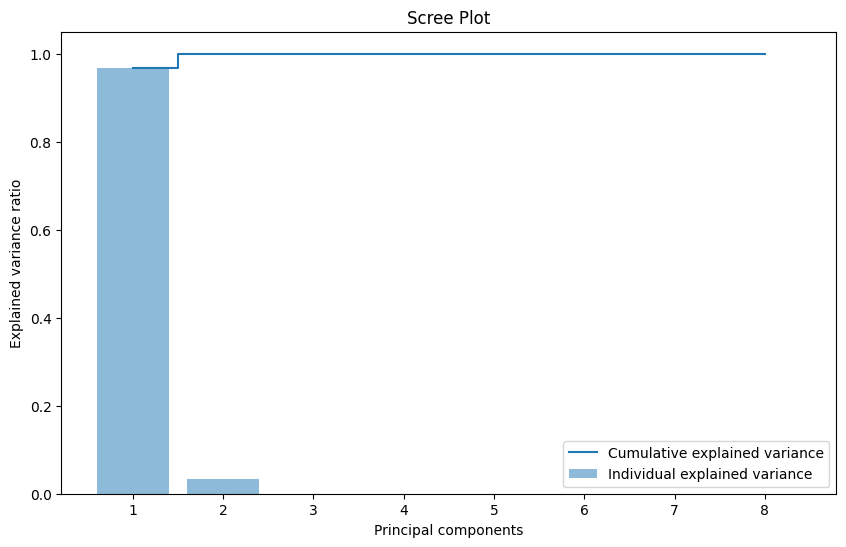

In [14]:
import matplotlib.pyplot as plt
import numpy as np

explained_variance_ratio = np.array(pc.pcaExplainedVarianceRatio(pca))

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Scree Plot')
plt.legend()
plt.show()